# Training Data

In [169]:
import numpy
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)

# Labeled training set
training_images = images[:300]
training_images= numpy.transpose(training_images)
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_images= numpy.transpose(test_images)
test_labels = labels[300:]


# k-NN Classification Using 2-D Features

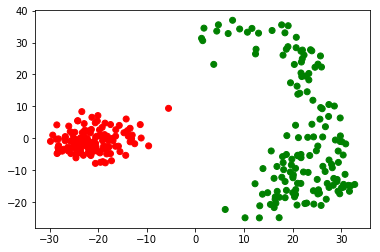

In [170]:
import matplotlib.pyplot as pyplot
m = numpy.mean(training_images,1)
trainc = training_images - numpy.reshape(m,(64,1))
U,S,Vh = numpy.linalg.svd(trainc)
U2 = U[:,0:2]
feat = numpy.matmul(numpy.transpose(U2),trainc)

c = ['r' if l==0 else 'g' for l in training_labels]
f = pyplot.figure()
pyplot.scatter(feat[0,:], feat[1,:], c = c)


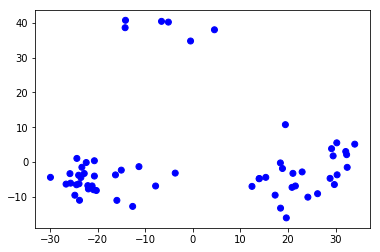

In [171]:
m = numpy.mean(test_images,1)
testc = test_images - numpy.reshape(m,(64,1))
U,S,Vh = numpy.linalg.svd(testc)
U2 = U[:,0:2]
feat2 = numpy.matmul(numpy.transpose(U2),testc)

predlabel = numpy.empty([60], dtype = int)

for i in range(60):
    knn = numpy.empty([300,2])
    for j in range(300):
        dist = numpy.sqrt((feat[0,j] - feat2[0,i])**2 + (feat[1,j] - feat2[1,i])**2)
        knn[j,0] = dist
        knn[j,1] = training_labels[j]
    
    def fcn(x):
        return x[0]
    knn = sorted(knn, key=fcn)
    sum = knn[0][1] + knn[1][1] + knn[2][1] + knn[3][1] + knn[4][1]
    if sum >= 3:
        predlabel[i] = 1
    else:
        predlabel[i] = 0
    predlabel[i] = int(predlabel[i])

c2 = ['b' if x==test_labels[i] else 'k' for i,x in enumerate(predlabel)]
f = pyplot.figure()
pyplot.scatter(feat2[0,:], feat2[1,:], c = c2)


As seen in the scatter plot, all of the points are blue. This means that no point was classified incorrectly. The average error doesn't even need to be calculated since it is just 0. I will still calculate it just to display it.

In [172]:
sum = 0
for i in range(60):
    if (predlabel[i] != test_labels[i]):
        sum = sum+1
error = sum/60
print("Error:", error)

Error: 0.0


# k-NN Classification Using Higher-dimensional Features

In [179]:
m = numpy.mean(training_images,1)
trainc = training_images - numpy.reshape(m,(64,1))
U,S,Vh = numpy.linalg.svd(trainc)
k = 0
sum = 0
while sum < .95:
    k+=1
    sum = 0
    for i in range(k):
        sum += numpy.square(S[i]);
    sum = sum/numpy.square(numpy.linalg.norm(trainc))
print('Need the top',k, 'principal components to capture 95% of variation.')

Need the top 19 principal components to capture 95% of variation.


Text(0,0.5,'Error')

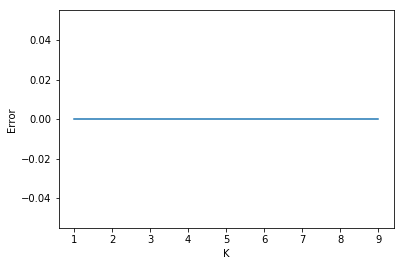

In [180]:
m = numpy.mean(test_images,1)
testc = test_images - numpy.reshape(m,(64,1))
U,S,Vh = numpy.linalg.svd(testc)
U2 = U[:,0:19]
feat2 = numpy.matmul(numpy.transpose(U2),testc)

predlabel = numpy.empty([60], dtype = int)

for i in range(60):
    knn = numpy.empty([300,2])
    for j in range(300):
        dist = numpy.sqrt((feat[0,j] - feat2[0,i])**2 + (feat[1,j] - feat2[1,i])**2)
        knn[j,0] = dist
        knn[j,1] = training_labels[j]
    
    def fcn(x):
        return x[0]
    knn = sorted(knn, key=fcn)
    sum = knn[0][1] + knn[1][1] + knn[2][1] + knn[3][1] + knn[4][1]
    if sum >= 3:
        predlabel[i] = 1
    else:
        predlabel[i] = 0
    predlabel[i] = int(predlabel[i])

error = numpy.empty([5], dtype = int)
for j in range(1,6):
    sum = 0
    for l in range(j):
        sum = knn[j][1]
    
    if sum >= (j):
        predlabel[i] = 1
    else:
        predlabel[i] = 0
    
    sum = 0
    for i in range(60):
        if (predlabel[i] != test_labels[i]):
            sum = sum+1
    error[j-1] = sum/60
    
f = pyplot.figure()
x = [1, 3, 5, 7, 9]
pyplot.plot(x, error)
pyplot.xlabel('K')
pyplot.ylabel('Error')

All values of k give 0 error. This makes it hard to determine what the best k value would be for a 0-1 classification. By looking solely at the plot you could say k=1 because its the same effectiveness as k=9 with less computation time but k=1 does not logically make sense as it could easily lead to misclassification. If I had to guess, k=9 would be redundant as a lesser k-value would accomplish the same result. I would say k=5 is enough to correctly classify data points.